In [1]:
import cv2 as cv
from PIL import Image
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import os


BASE_DATA_DIR = "../data"
CATS = "/cat images"
VIDEOS = "/videos"

os.listdir(BASE_DATA_DIR + CATS)

['cat-5.png', 'cat-1.png', 'cat-0.png', 'cat-2.png', 'cat-4.png', 'cat-3.png']

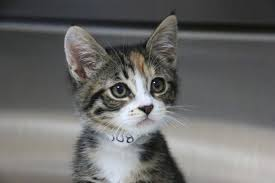

In [2]:
img = cv.imread(BASE_DATA_DIR + CATS + "/cat-1.png")
to_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
display(Image.fromarray(to_rgb))

#### Blurring

First, we need to have a kernel/window that maps the image.
Essentially, blur is applied to the middle pixel of the kernel as a result of the pixels around it (surrounding pixels)
  - Thats why we need to have an odd kernel size

#### Averaging method

The kernel will compute the pixel intensity of the middle pixel of the true center as the average of the surrounding pixel intensities.

```
3x3 Kernel
----------------------
-  3   -  1   -  5   -
----------------------
-  4   -  X   -  2   -
----------------------
-  1   -  8   -  2   -
----------------------
```
X pixel is computed as (3 + 1 + 5 + 4 + 2 + 1 + 8 + 2) / 8 (all surrounding pixels)

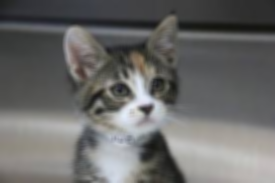

In [12]:
# Averaging method
average = cv.blur(img, ksize=(5, 5))
rgb = cv.cvtColor(average, cv.COLOR_BGR2RGB)
display(Image.fromarray(rgb))

#### Gaussian method

Gaussian blur is a technique that is similar to average blur, except that each pixel is given a particular weight. And essentially the average of the products of those weights gives you the value for the true center.

- Using Gaussian blur results in less blur than the average method but the result is more natural

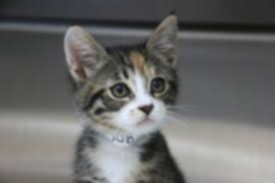

In [13]:
# sigmaX is the standard deviation in the X direction
gauss_blur = cv.GaussianBlur(img, ksize=(5, 5), sigmaX=0)
rgb = cv.cvtColor(gauss_blur, cv.COLOR_BGR2RGB)
display(Image.fromarray(rgb))

#### Median method

It does the same thing as the average method, but it uses the median of the surrounding pixels instead of the average.

- Generally, median blurring tends to be more effective in reducing noise in an iage as compared to averaging and Gaussian blur.
- It's also good at removing salt and pepper noise

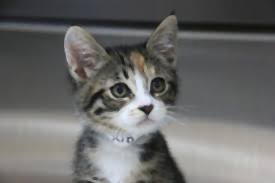

In [16]:
# it is recommended to adjust ksize below 5
median = cv.medianBlur(img, ksize=3)
rgb = cv.cvtColor(median, cv.COLOR_BGR2RGB)
display(Image.fromarray(rgb))

#### Bilateral method

Bilateral blur is the most effective technique and sometimes used in alot of computer vision applications just because how it blurs the image.

In normal blurring, the image is blurred without looking at whether you're reducing edges or not.

Bilateral blurring however, applies blurring but retains (preserves) the edges in the image. (non-linear filter ?)

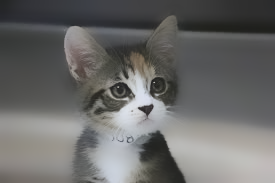

In [23]:
# Bilateral method
# d: is diameter
# sigma color: a larger value means that there are more colors in the neighborhood
# that will be considered when the blur is computed
# sigma space: larger values of this space sigma means that pixels further out 
# from the central pixel will influence the blurring calculation
Bilateral = cv.bilateralFilter(img, d=20, sigmaColor=100, sigmaSpace=50)
rgb = cv.cvtColor(Bilateral, cv.COLOR_BGR2RGB)
display(Image.fromarray(rgb))